In [1]:
%pip install pyyaml
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
def get_epochs_df(filepath: str):
    with open(filepath, 'r') as file:
        epochs = yaml.safe_load(file)
    return pd.DataFrame(epochs)

In [27]:
faster_rcnn_loss_metrics = [
    {"key": "loss", "title": "Total Loss"},
    {"key": "loss_classifier", "title": "Classification Loss"},
    {"key": "loss_box_reg", "title": "Box Regression Loss"},
    {"key": "loss_rpn_box_reg", "title": "RPN Box Regression Loss"},
]
fcos_loss_metrics = [
    {"key": "loss", "title": "Total Loss"},
    {"key": "loss_classification", "title": "Classification Loss"},
    {"key": "loss_bbox_regression", "title": "Box Regression Loss"},
    {"key": "loss_bbox_ctrness", "title": "Box Centerness Loss"},
]

In [17]:
def plot_results(df, loss_metrics):
    fig, ax = plt.subplots(1, 4, figsize=(32,8))
    fig.suptitle("Model Training")
    ax[0].set_title("Training Loss")
    for metric in loss_metrics:
        sns.lineplot(df, ax=ax[0], x="epoch", y=metric["key"], label=metric["title"])
    ax[1].set_title("Learning Rate")
    sns.lineplot(df, ax=ax[1], x="epoch", y="learning_rate")
    ax[2].set_title("mAP50")
    ax[2].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[2], x="epoch", y="train_map50", label="train mAP50")
    sns.lineplot(df, ax=ax[2], x="epoch", y="val_map50", label="val mAP50")
    ax[3].set_title("mAP50-95")
    ax[3].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[3], x="epoch", y="train_mAP50_95", label="train mAP50-95")
    sns.lineplot(df, ax=ax[3], x="epoch", y="val_mAP50_95", label="val mAP50-95")
    return fig, ax

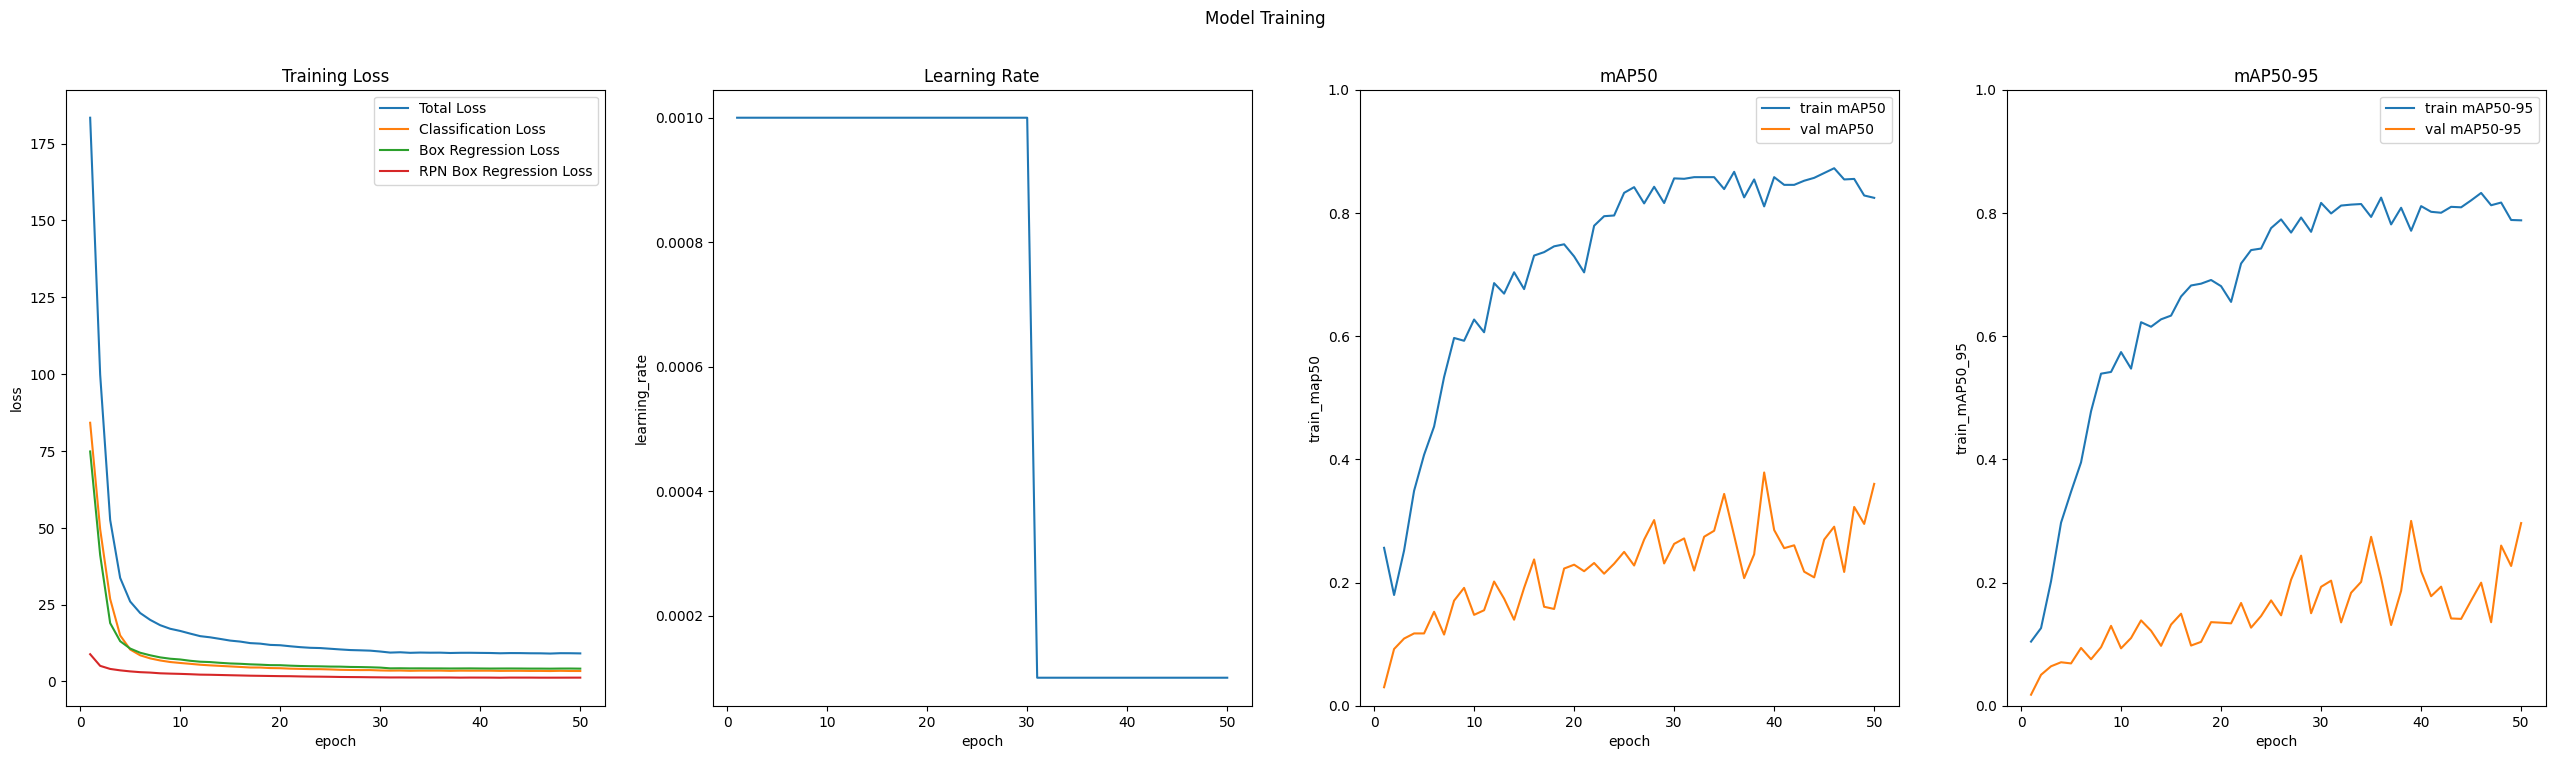

In [24]:
fig, ax = plot_results(get_epochs_df("epochs.yaml"), faster_rcnn_loss_metrics)

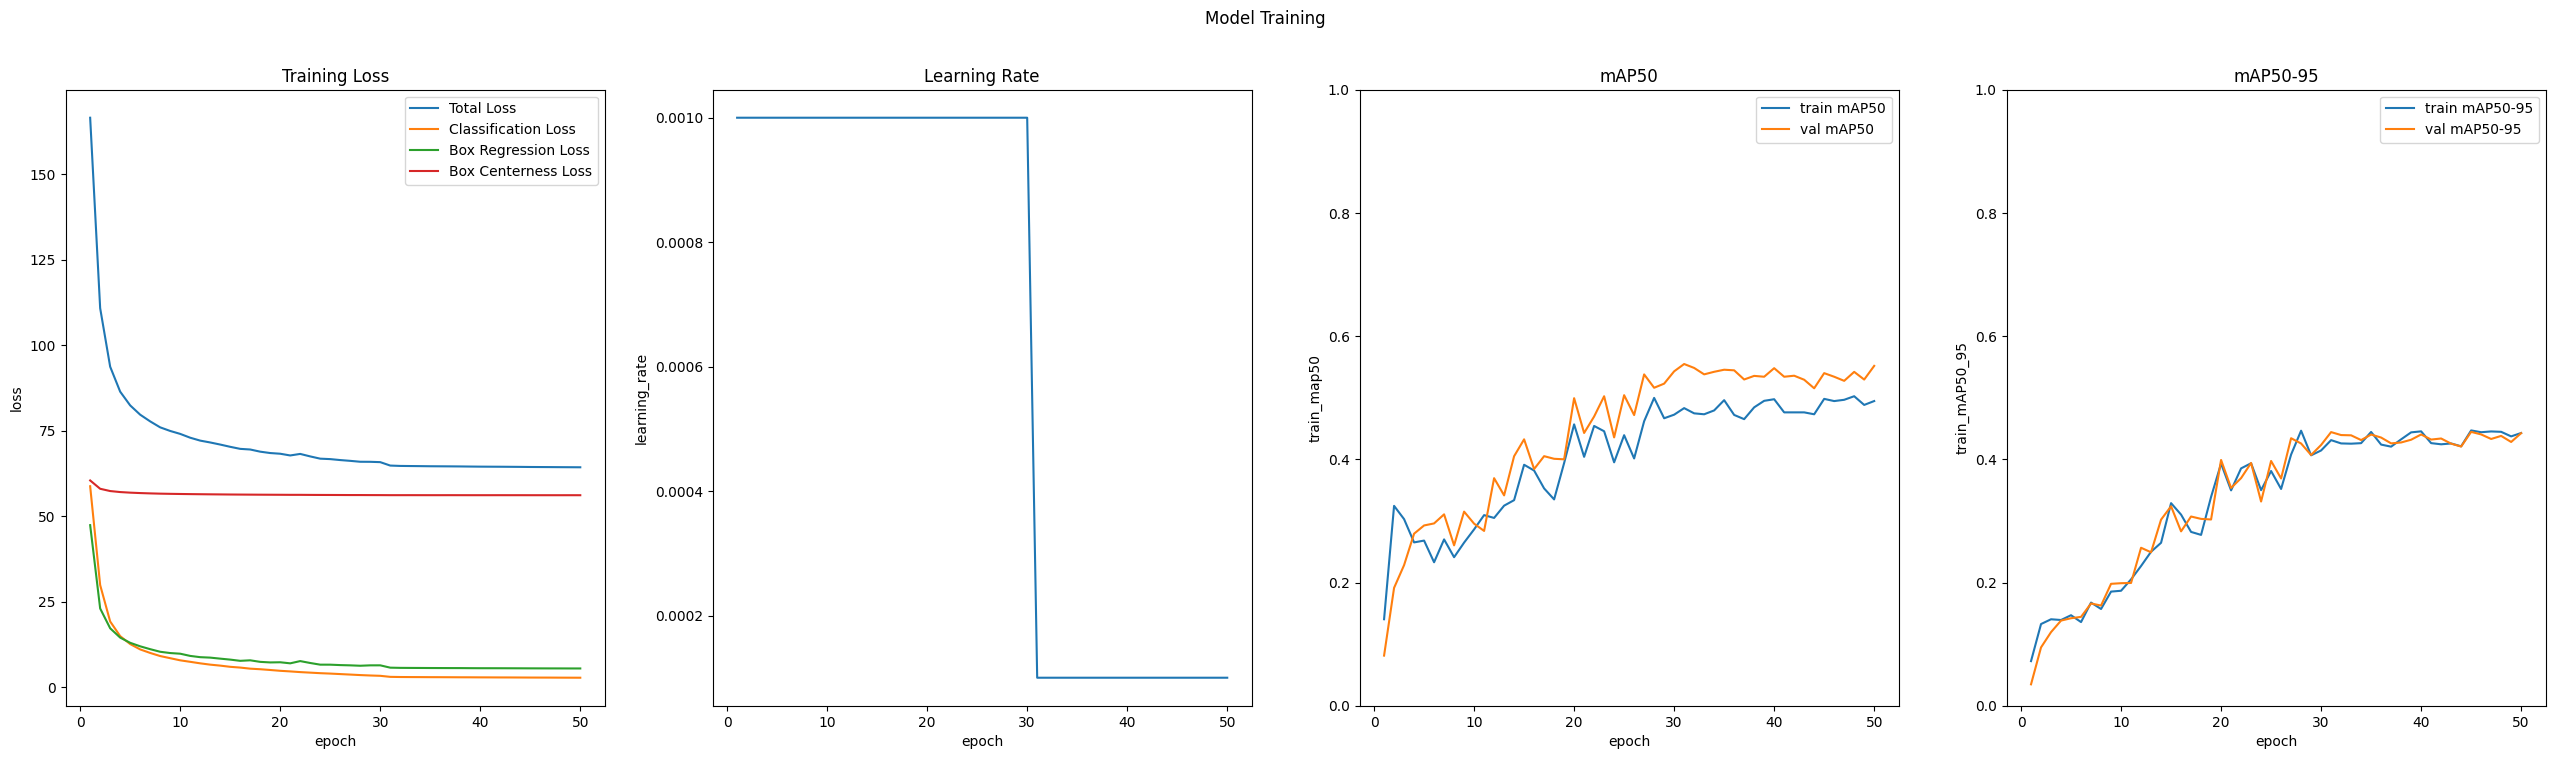

In [28]:
fig, ax = plot_results(get_epochs_df("epochs2.yaml"), fcos_loss_metrics)

In [48]:
def read_multiple_logs(logfiles: list[str], names: list[str]):
    dfs = []
    for i in range(len(logfiles)):
        df = get_epochs_df(logfiles[i])
        df["model_name"] = names[i]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [54]:
def plot_comparison(df):
    fig, ax = plt.subplots(2, 3, figsize=(32,16))
    fig.suptitle("Model Comparison")
    ax[0][0].set_title("Training Loss")
    sns.lineplot(df, ax=ax[0][0], x="epoch", y="loss", hue="model_name")
    ax[0][1].set_title("Learning Rate")
    sns.lineplot(df, ax=ax[0][1], x="epoch", y="learning_rate", hue="model_name")
    ax[0][2].set_title("Train mAP50")
    ax[0][2].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[0][2], x="epoch", y="train_map50", hue="model_name")
    ax[1][0].set_title("Val mAP50")
    ax[1][0].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[1][0], x="epoch", y="val_map50", hue="model_name")
    ax[1][1].set_title("Train mAP50-95")
    ax[1][1].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[1][1], x="epoch", y="train_mAP50_95", hue="model_name")
    ax[1][2].set_title("Val mAP50-95")
    ax[1][2].set_ylim(0.0, 1.0)
    sns.lineplot(df, ax=ax[1][2], x="epoch", y="val_mAP50_95", hue="model_name")
    return fig, ax

In [55]:
df = read_multiple_logs(logfiles=["epochs.yaml", "epochs2.yaml"], names=["Faster R-CNN", "FCOS"])
df.head(5)

,learning_rate,lr_step_every,optim,scheduler,epoch_start,batch_size,val_batch_size,n_batches_validation,loss,loss_classifier,...,epoch_end,train_map50,train_mAP50_95,val_map50,val_mAP50_95,epoch,model_name,loss_classification,loss_bbox_regression,loss_bbox_ctrness
0,0.001,10,<class 'torch.optim.sgd.SGD'>,<class 'torch.optim.lr_scheduler.StepLR'>,2024-01-06 20:13:13.286627+01:00,16,2,2,183.416494,84.175609,...,2024-01-06 20:15:34.211990+01:00,0.256331,0.104104,0.030000,0.017875,1,Faster R-CNN,NaN,NaN,NaN
1,0.001,10,<class 'torch.optim.sgd.SGD'>,<class 'torch.optim.lr_scheduler.StepLR'>,2024-01-06 20:15:53.560423+01:00,16,2,2,99.834162,49.529878,...,2024-01-06 20:18:12.355014+01:00,0.179736,0.126014,0.092014,0.050208,2,Faster R-CNN,NaN,NaN,NaN
2,0.001,10,<class 'torch.optim.sgd.SGD'>,<class 'torch.optim.lr_scheduler.StepLR'>,2024-01-06 20:18:27.033509+01:00,16,2,2,52.556847,26.832402,...,2024-01-06 20:20:33.334463+01:00,0.251949,0.201970,0.109028,0.064028,3,Faster R-CNN,NaN,NaN,NaN
3,0.001,10,<class 'torch.optim.sgd.SGD'>,<class 'torch.optim.lr_scheduler.StepLR'>,2024-01-06 20:20:42.925313+01:00,16,2,2,33.699557,14.986496,...,2024-01-06 20:22:43.365836+01:00,0.348858,0.297096,0.117361,0.070556,4,Faster R-CNN,NaN,NaN,NaN
4,0.001,10,<class 'torch.optim.sgd.SGD'>,<class 'torch.optim.lr_scheduler.StepLR'>,2024-01-06 20:22:49.397414+01:00,16,2,2,26.017172,10.409976,...,2024-01-06 20:24:46.234269+01:00,0.407315,0.347309,0.117361,0.068681,5,Faster R-CNN,NaN,NaN,NaN


(<Figure size 3200x1600 with 6 Axes>,
 array([[<Axes: title={'center': 'Training Loss'}, xlabel='epoch', ylabel='loss'>,
         <Axes: title={'center': 'Learning Rate'}, xlabel='epoch', ylabel='learning_rate'>,
         <Axes: title={'center': 'Train mAP50'}, xlabel='epoch', ylabel='train_map50'>],
        [<Axes: title={'center': 'Val mAP50'}, xlabel='epoch', ylabel='val_map50'>,
         <Axes: title={'center': 'Train mAP50-95'}, xlabel='epoch', ylabel='train_mAP50_95'>,
         <Axes: title={'center': 'Val mAP50-95'}, xlabel='epoch', ylabel='val_mAP50_95'>]],
       dtype=object))

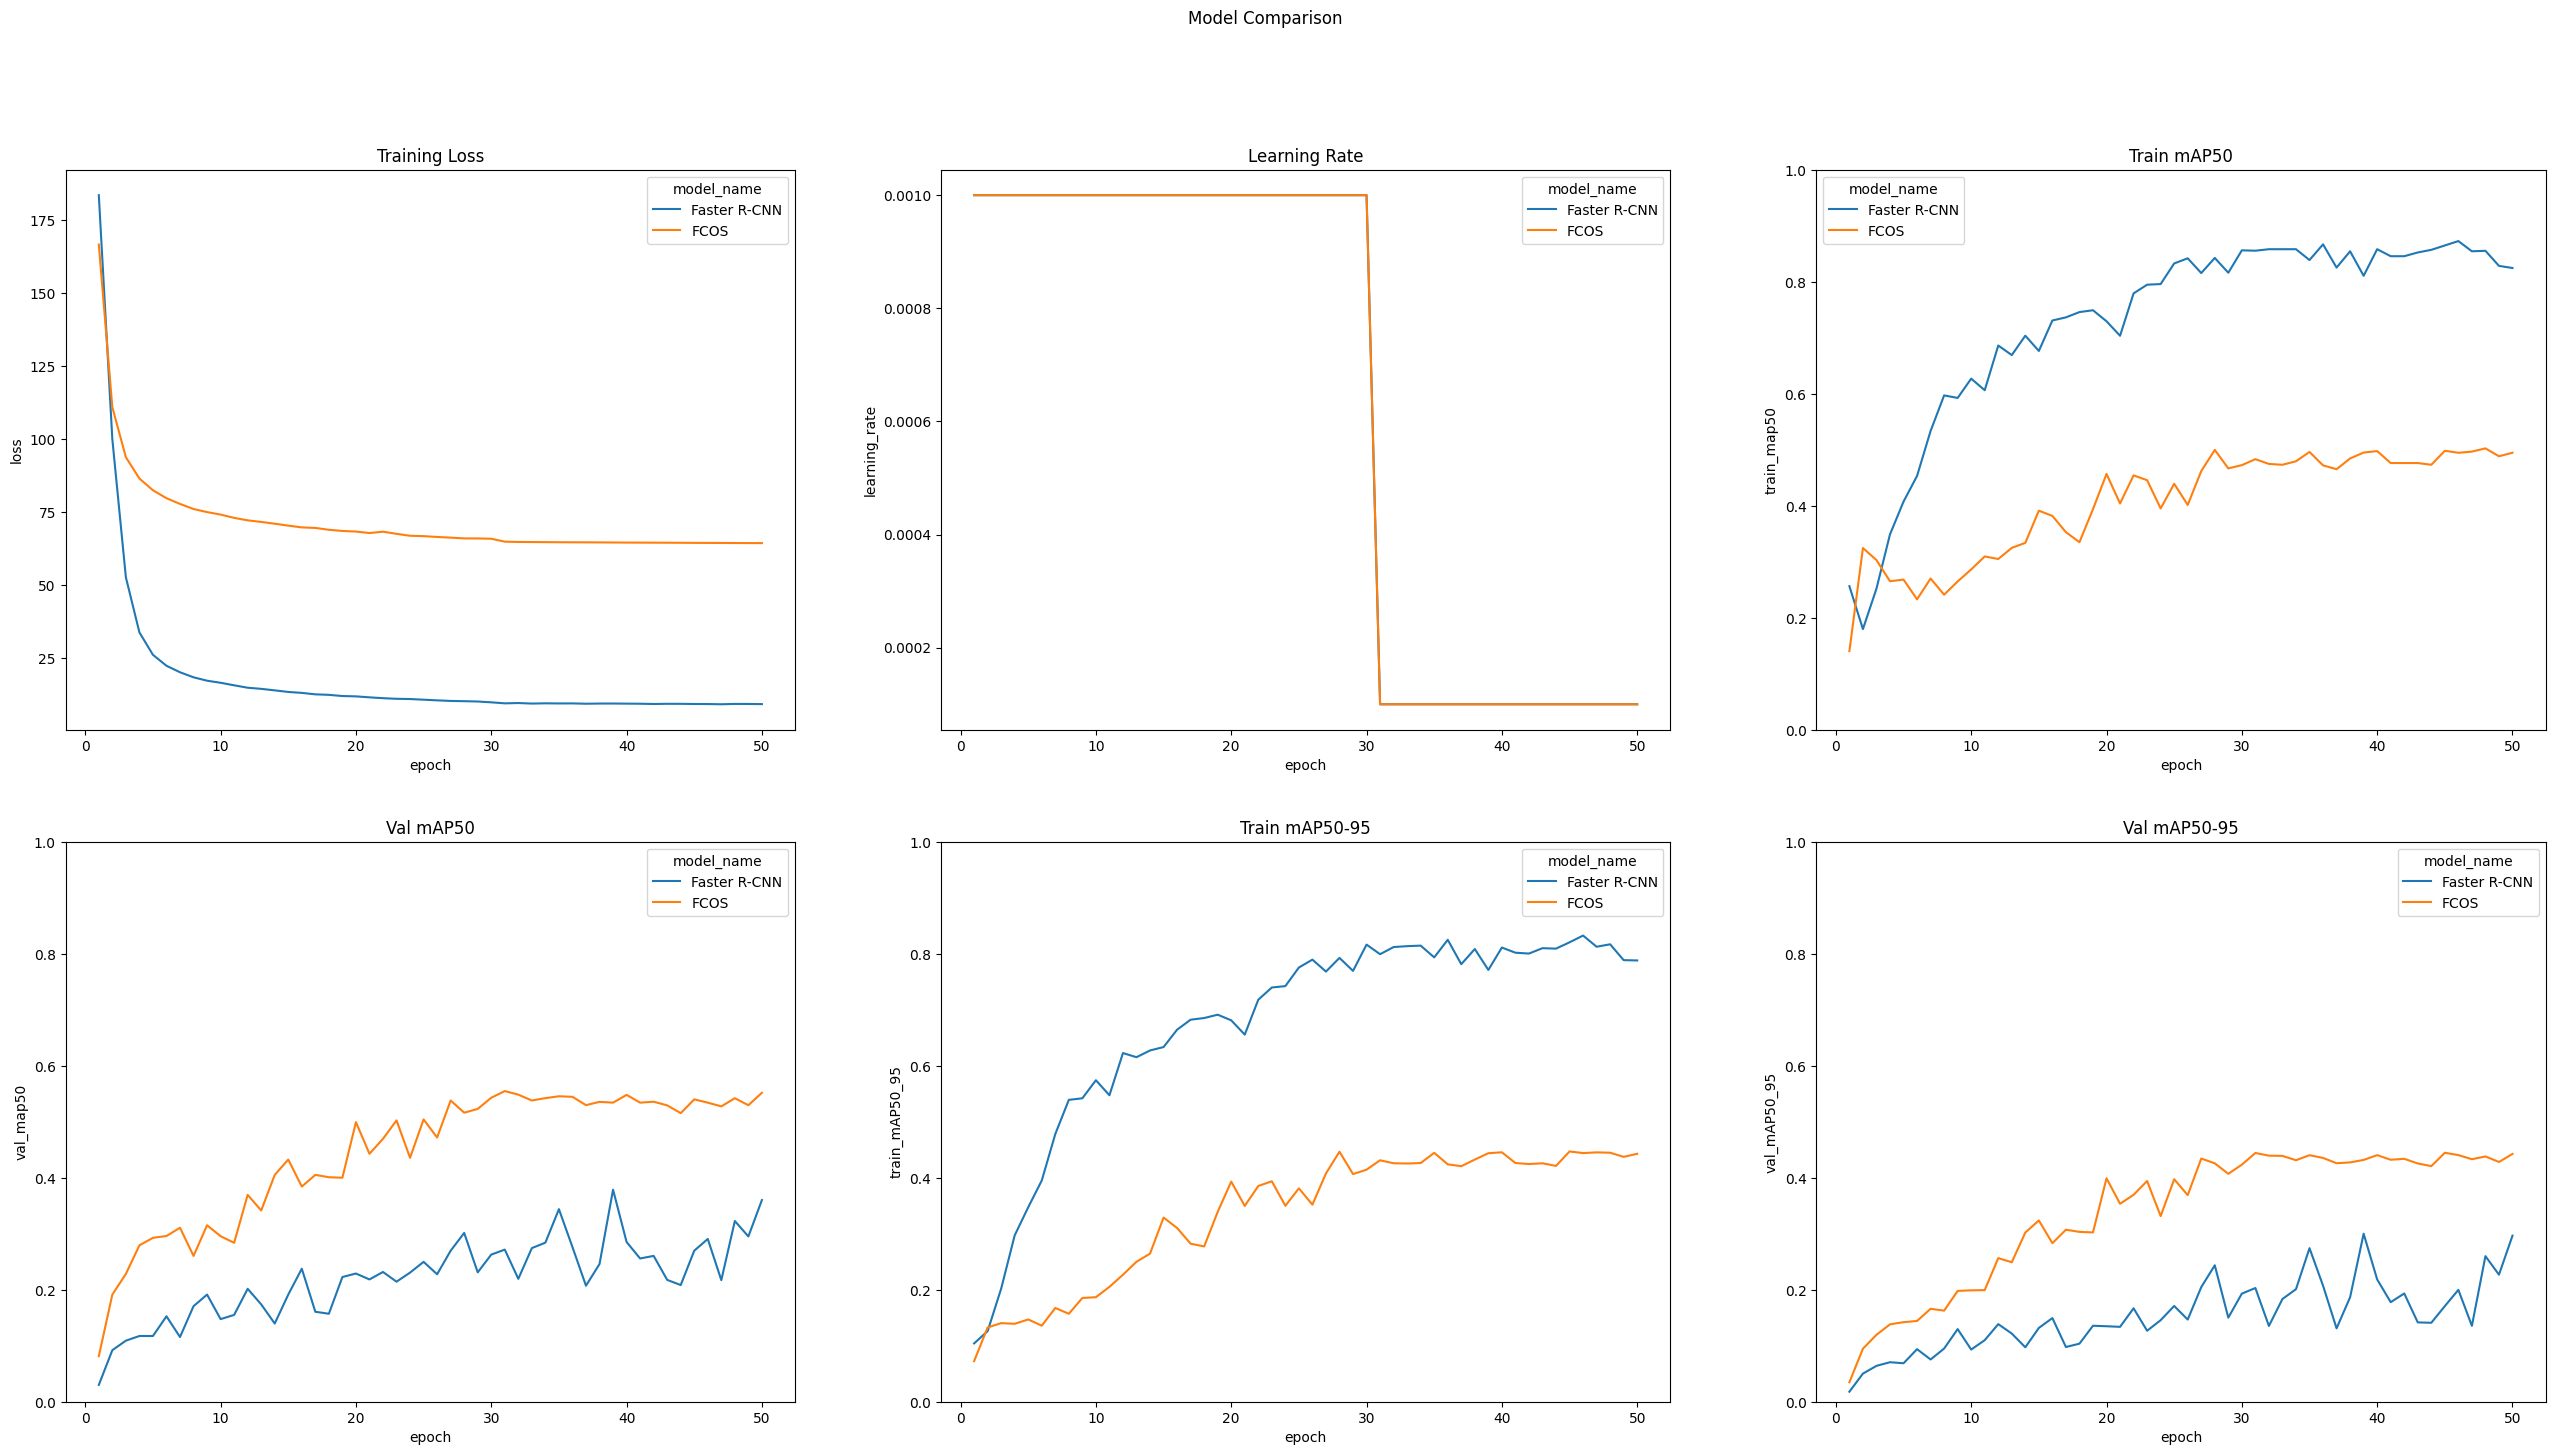

In [56]:
plot_comparison(df)